# 2018-05-11 - Représenter l'information sur une image naturelle
*L'entropie mesure l'incertitude dans un processus stochastique : plus un objet est incertain plus il est entropique. En image, on peut s'attendre à ce que les zones avec le plus de variances soient celles qui possèdent le plus d'entropie.*
Dans l'objectif d'intégrer des saccades au modèle, on intègre une mesure d'information dans l'image pour regarder les zones qui sont les plus informatives en premier.

Essayons sur une photo du lac Myvatn, en Islande :

In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


def calculate_entropy(signal):
    probabability_distribution = [np.size(signal[signal == i])/(1.0 * signal.size) for i in list(set(signal))]
    entropy = np.sum([pp * np.log2(1.0 / pp) for pp in probabability_distribution])
    return entropy

#on utilise une image qu'on transforme en greyscale avec un calcul d'entropie dans la zone
def image_entropy(img, size = 5, reshape_width = 500):
    image = Image.open(img)
    
    #reshape l'image en reshape_width*hsize, proportionnellement
    wpercent = (reshape_width / float(image.size[0]))
    hsize = int((float(image.size[1]) * float(wpercent)))
    image = image.resize((reshape_width, hsize), Image.ANTIALIAS)
    print('Image reshaped to %s x %s' % (reshape_width, hsize))
    
    image_grey = image.convert('L')

    #simplifie les étapes suivantes
    image = np.array(image)
    image_grey = np.array(image_grey)

    #définir la zone dans laquelle on calcule, de (size*2) x (size*2)
    rows, cols = image_grey.shape
    entropy = np.array(image_grey) #dummy var
    
    for row in range(rows) :
        for col in range(cols):
            lower_x = np.max([0, col - size])
            upper_x = np.min([cols, col + size])
            lower_y = np.max([0, row - size])
            upper_y = np.min([rows, row + size])

            area = image_grey[lower_y: upper_y, lower_x: upper_x].flatten()
            
            entropy[row,col] = calculate_entropy(area)
            
    return entropy  

image_entropy_values = image_entropy('myvatn.JPG')

Image reshaped to 500 x 375


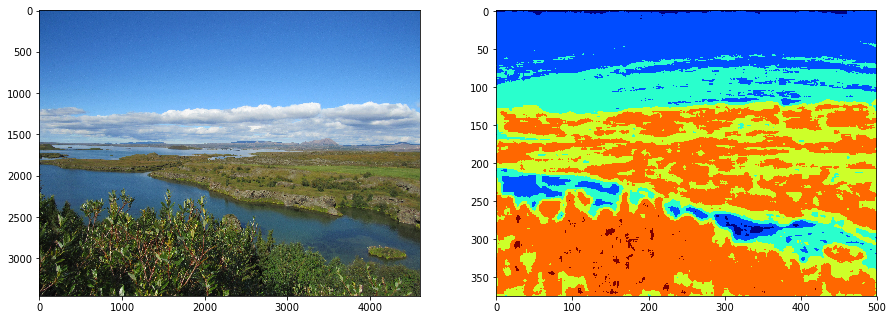

In [51]:
plt.rcParams["figure.figsize"] = [15, 15]

plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(image_entropy_values, cmap = plt.cm.jet)
